In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory
        if os.path.isdir(fullPath):
            allFiles.append(fullPath)
            # allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [58]:
path = "./data/20221203_180_res_simplelight_weekday"

In [4]:
overall_dict = {"x":[],"y":[],"energy":[]}
energy_list = [0]*44
x_list = []
y_list = []
anx_list = []

for d in getListOfFiles(path):
    files = getListOfFiles(d)
    overall_path = files[4]
    df = pd.read_csv(overall_path)
    energy_list+=df["total_energy"]
    anxiety_path = files[1]
    df = pd.read_csv(anxiety_path)
    for i in range(df.shape[0]):
        x_list.append(df.iloc[i][2])
        y_list.append(df.iloc[i][3])
        anx_list.append(df.iloc[i][4])
df_xy = pd.read_csv("./data/20221203_10_res_powerlight_weekend/powerlight_simulation_0.1_20221204_002124/overall.csv")
overall_dict = {"x":df_xy["light_x"],"y":df_xy["light_y"],"energy":energy_list/10}

NotADirectoryError: [Errno 20] Not a directory: './data/20221203_10_res_simplelight_weekday/anxiety.csv'

In [ ]:
pd.DataFrame({"x":x_list,"y":y_list,"anxiety":anx_list}).to_csv(path+"/anxiety.csv",index=False)
pd.DataFrame(overall_dict).to_csv(path+"/overall.csv",index=False)

In [36]:
df = pd.read_csv(path+"/anxiety.csv")

In [ ]:
def is_street(x,y):
    if (150<=x<=220 or 450<=x<=520 or 750<=x<=820 or 1050<=x<=1120)  or (10<=y<=80 or 245<=y<=315 or 520<=y<=590 or 755<=y<=825 or 950<=y<=1020 or 1100<=y<=1170):
        return True
    else:
        return False 

In [ ]:
for i in range(df.shape[0]):
    if(not is_street(int(df.iloc[i][0]),int(df.iloc[i][1]))):
        df.iloc[i][2] = 0

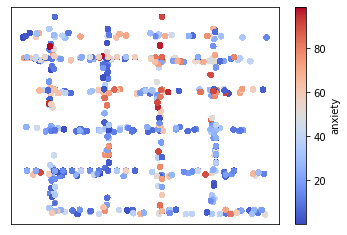

In [304]:
ax = df.plot(x="x", y="y", kind="scatter", c="anxiety",  colormap="coolwarm")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

In [59]:
df = pd.read_csv(path+"/overall.csv")

In [60]:
# plot street

fig = go.Figure(data=go.Scatter(
    x=df['x'],
    y=df['y'],
    mode='markers',
    name='total energy of light',
    marker=dict(size=df['energy']/4000,color="orange")
))


# update layout
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
# fig.update_yaxes(tickvals=[100,1000])
# fig.update_xaxes(tickvals=[100,1000])
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(
        width=700,
        height=600,
        title={
        'text': "Total Energy Consumption by Location",
        'y':0.95,
        'x':0.3,
        'xanchor': 'center',
        'yanchor': 'top'},
        # legend_title="Legend",
        font=dict(
        size=12,
        ))

fig.show()